In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as la
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from sklearn import preprocessing
from numba import cuda
from sklearn import svm

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
def get_max_value(A):
  res_list=[]
  for j in range(np.shape(A)[1]):
    one_list=[]
    for i in range(np.shape(A)[0]):
      one_list.append(A[i,j])
    res_list.append(np.max(one_list))
  return res_list

In [3]:
records = pd.read_csv("creditcard.csv")
creditcard = np.matrix(records)
print(np.shape(creditcard))

(284807, 31)


In [4]:
IsFraud = creditcard[:,30]
RiskD = np.argwhere(IsFraud.T==1)[:,1]
RiskND = np.argwhere(IsFraud.T==0)[:,1]

In [5]:
creditcard = np.delete(creditcard,(0,30),axis=1)
cmax = get_max_value(creditcard)
creditcard = np.divide(creditcard,cmax)

In [6]:
creditcard_R = np.delete(creditcard,RiskND,axis=0)
creditcard_NR = np.delete(creditcard,RiskD,axis=0)

In [7]:
credit_NR_Train = creditcard_NR[:10000,:]
credit_R_Train = creditcard_R[:300,:]
print(np.shape(credit_NR_Train))
credit_NR_Train

(10000, 29)


matrix([[-5.53908722e-01, -3.29957691e-03,  2.70325707e-01, ...,
          4.22490003e-03, -6.21991639e-04,  5.82379309e-03],
        [ 4.85495357e-01,  1.20660977e-02,  1.77435733e-02, ...,
         -2.84165597e-04,  4.35011014e-04,  1.04705276e-04],
        [-5.53316822e-01, -6.07570741e-02,  1.88989960e-01, ...,
         -1.75099479e-03, -1.76530902e-03,  1.47389219e-02],
        ...,
        [ 3.09666737e-01,  3.64094436e-04,  6.97547377e-02, ...,
         -2.56248408e-03,  1.17487074e-03,  7.79256367e-03],
        [-3.16583571e-01,  1.21228906e-01, -5.70019857e-01, ...,
         -5.42652286e-02, -2.14718544e-02,  2.86012776e-03],
        [-6.19350634e-01, -5.52307253e-02,  1.95434490e-01, ...,
         -1.30187747e-03, -2.67798219e-03,  1.35906670e-02]])

In [8]:
creditTest_NR = creditcard_NR[200000:,:]
print(np.shape(creditTest_NR))

(84315, 29)


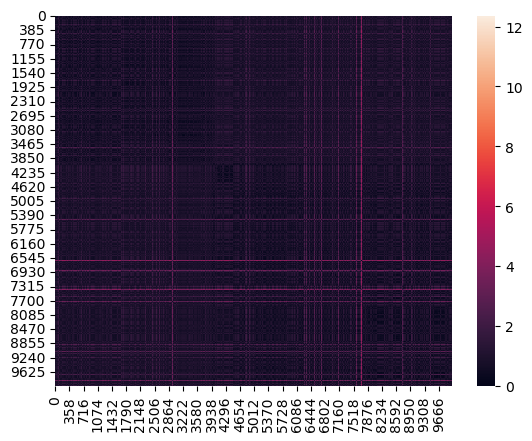

In [9]:
EDMTrain_NR = pdist(credit_NR_Train,metric='euclidean')
EDMTrain_NR = squareform(EDMTrain_NR)
sns.heatmap(EDMTrain_NR)
plt.show()

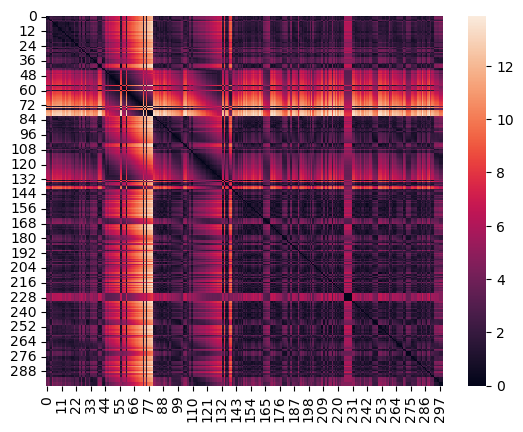

In [10]:
EDMTrain_R = pdist(credit_R_Train,metric='euclidean')
EDMTrain_R = squareform(EDMTrain_R)
sns.heatmap(EDMTrain_R)
plt.show()

In [22]:
clf = KMeans(n_clusters=500)
clf.fit(creditTest_NR)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


KMeans(n_clusters=500)

In [23]:
creditcard_NR_fit = clf.cluster_centers_

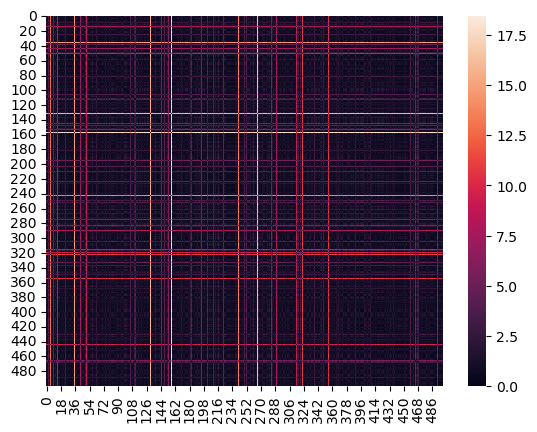

In [24]:
EDMTrain_NR_fit = pdist(creditcard_NR_fit,metric='euclidean')
EDMTrain_NR_fit = squareform(EDMTrain_NR_fit)
sns.heatmap(EDMTrain_NR_fit)
plt.show()

In [62]:
model = svm.SVC(kernel='linear', C=1,gamma=1,tol=0.000001) 
model.fit(np.asarray(np.vstack((creditcard_NR_fit,credit_R_Train))),np.asarray(np.hstack((np.zeros(500),np.ones(300)))))

SVC(C=1, gamma=1, kernel='linear', tol=1e-06)

In [63]:
countR = 0
for i in range(300, np.shape(creditcard_R)[0]):
    if model.predict(np.asarray(creditcard_R[i,:]))==0:
        countR += 1
print("R to NR",countR,len(range(300, np.shape(creditcard_R)[0])),countR/len(range(300, np.shape(creditcard_R)[0])))

countR = 0
for i in range(np.shape(credit_R_Train)[0]):
    if model.predict(np.asarray(credit_R_Train[i,:]))==0:
        countR += 1
print("R to NR",countR,np.shape(credit_R_Train)[0],countR/np.shape(credit_R_Train)[0])

R to NR 32 192 0.16666666666666666
R to NR 30 300 0.1
